## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

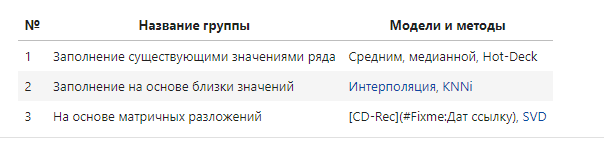

##### 7.1.1 Загрузка и подготовка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/2023-Melekhin-TimeSeriesCourse-main/practice/07 Imputation and Forecast')

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

(25000,)


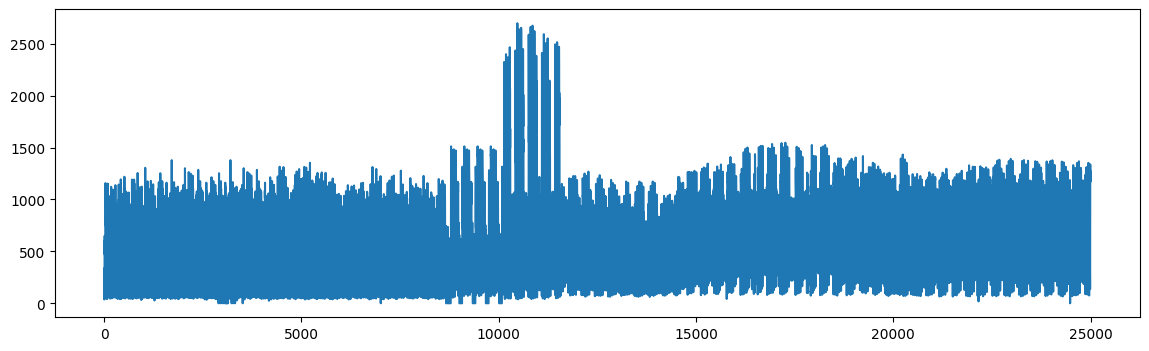

In [5]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значений
   
Процент пропущенных значений должен регулироваться отдельным параметром.


In [6]:
import torch
def add_nan(x, percent = 0.25):
    modified_series = np.copy(x)

    # Генерируем случайные индексы для добавления nan значений
    total_values = x.size
    nan_count = int(percent * total_values)
    nan_indices = np.random.choice(total_values, nan_count, replace=False)

    # Заменяем выбранные значения на nan
    modified_series.flat[nan_indices] = np.nan

    return modified_series, nan_indices


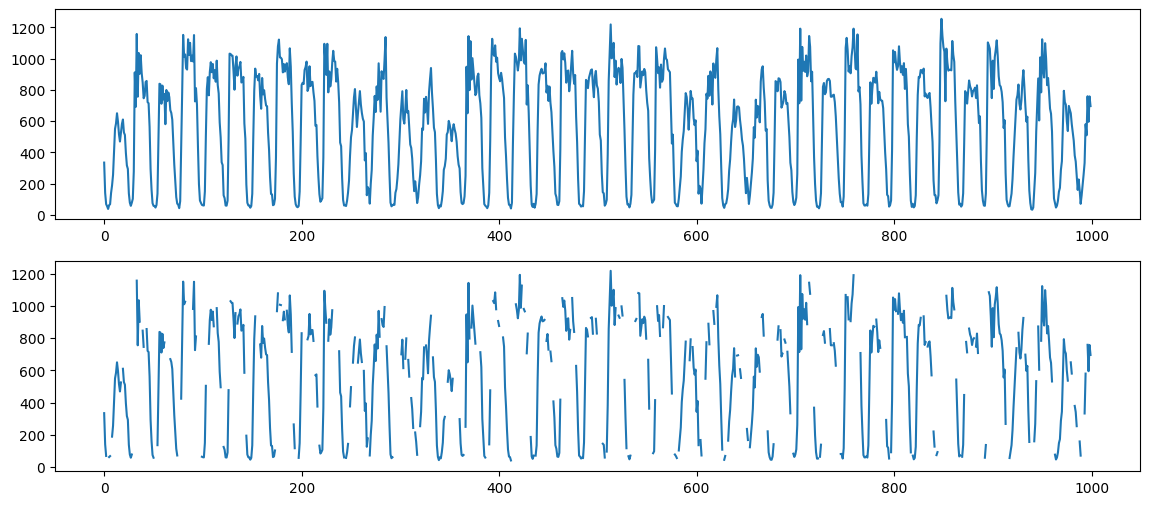

In [7]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [8]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [9]:
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

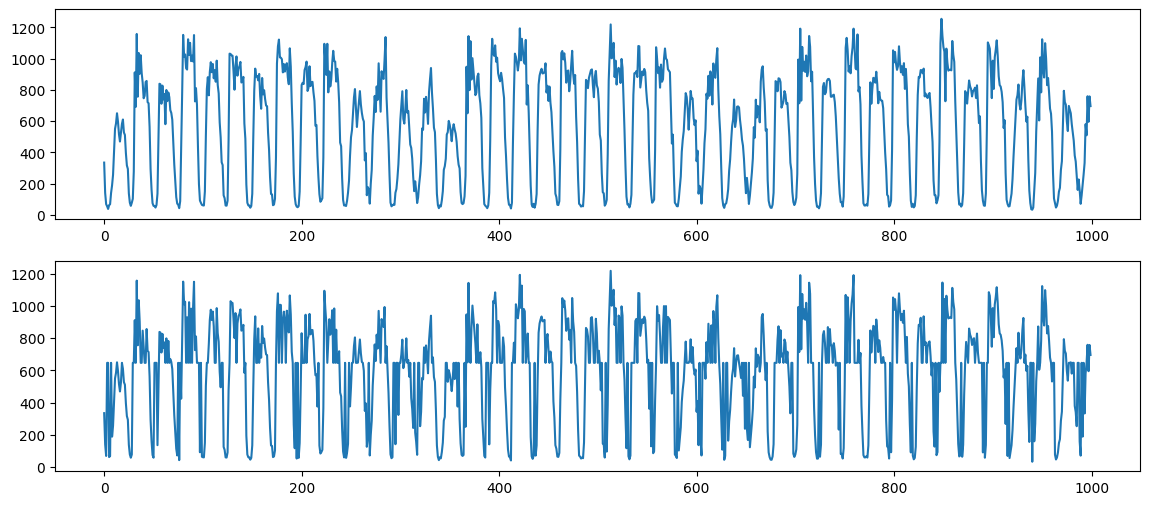

In [10]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

In [11]:
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [12]:
recovery['median'] = madrid_median

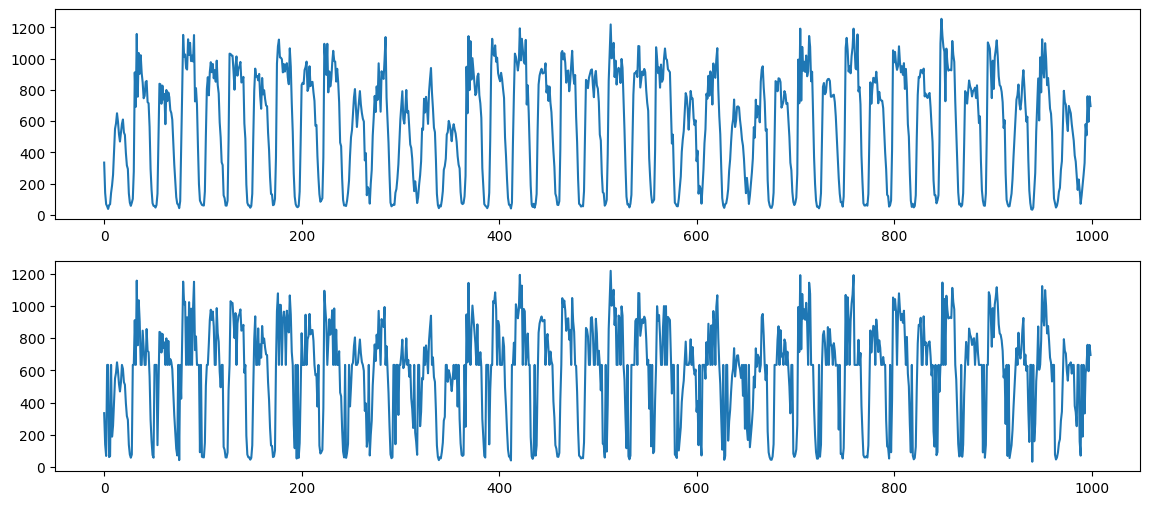

In [13]:
#madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()

Самостоятельно реализуйте один метод из первой группы ***табл. 7.1*** и проведите постановление данных, сохранив результаты восстановления.

##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов восстановления второй группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [14]:
from sklearn.impute import KNNImputer

In [15]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)
madrid_slice = rolling_window(madrid_with_nan, 100)


In [16]:
knn_imputer = KNNImputer(n_neighbors=100)
restored_slices = []
for window_data in madrid_slice:
    window_data = window_data.reshape(-1, 1)
    restored_window = knn_imputer.fit_transform(window_data)
    restored_slices.append(restored_window.flatten())

madrid_restored_v1 = np.concatenate(restored_slices)

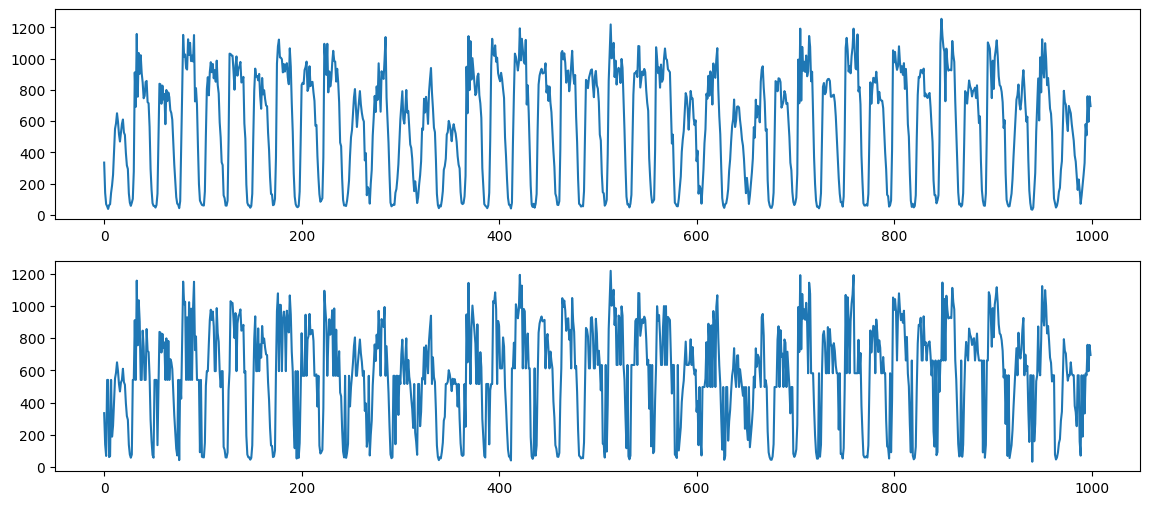

In [17]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_restored_v1[:1000])
plt.show()

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов восстановления третей группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [18]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=5ba2ba3871e902932f89cbb8f7bf12760b3608f500566e3f73f9ab90aa425b4c
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=1fc2d9d4025bc685b4593634203c4cb7e7941bc282275c283482ae1f4392d10f
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [19]:
from fancyimpute import IterativeImputer

In [20]:
imputer = IterativeImputer()

madrid_restored_2d = imputer.fit_transform(madrid_with_nan.reshape(-1, 1))

madrid_restored_v2 = madrid_restored_2d.flatten()

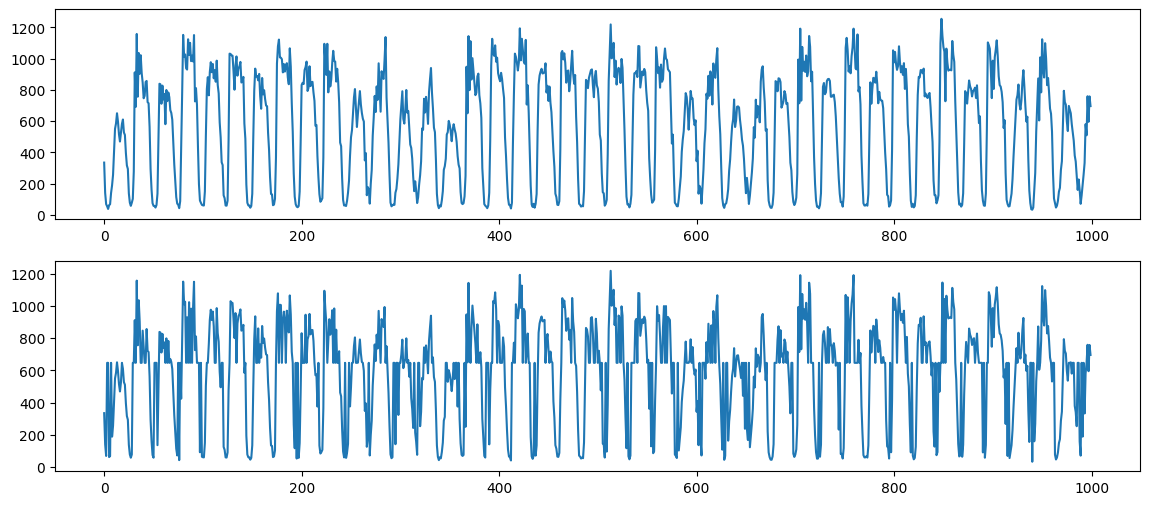

In [21]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_restored_v2[:1000])
plt.show()

##### 7.1.5 Сравнение результатов восстановления.

Для каждой группы методов постройте методов основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов.
Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



In [22]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(madrid, madrid_mean)
mse_median = mean_squared_error(madrid , madrid_median)
mse_restored_v1 = mean_squared_error(madrid , madrid_restored_v1)
mse_restored_v2 = mean_squared_error(madrid , madrid_restored_v2)

print(f'MSE (Mean): {mse_mean}')
print(f'MSE (Median): {mse_median}')
print(f'MSE (KNNImputer): {mse_restored_v1}')
print(f'MSE (IterativeImputer): {mse_restored_v2}')

MSE (Mean): 39716.25353356231
MSE (Median): 39744.25768
MSE (KNNImputer): 36462.95182728124
MSE (IterativeImputer): 39716.25353356231


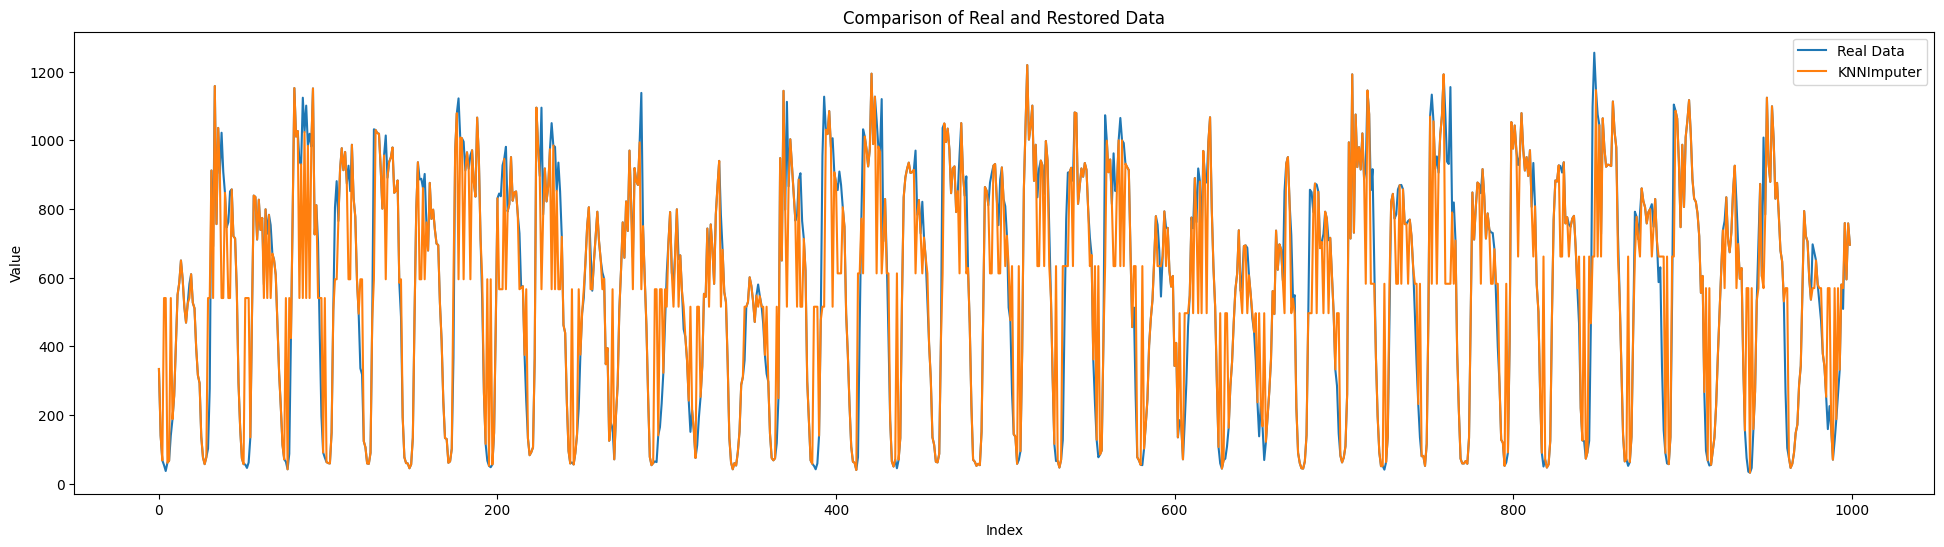

In [23]:
x = np.arange(len(madrid))

plt.figure(figsize=(24, 6))

# Построение графика для исходных данных
plt.plot(x[:1000], madrid[:1000], label='Real Data')

# График для выбранного метода восстановления
plt.plot(x[:1000], madrid_restored_v1[:1000], label='KNNImputer')

# Настройка графика
plt.title('Comparison of Real and Restored Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

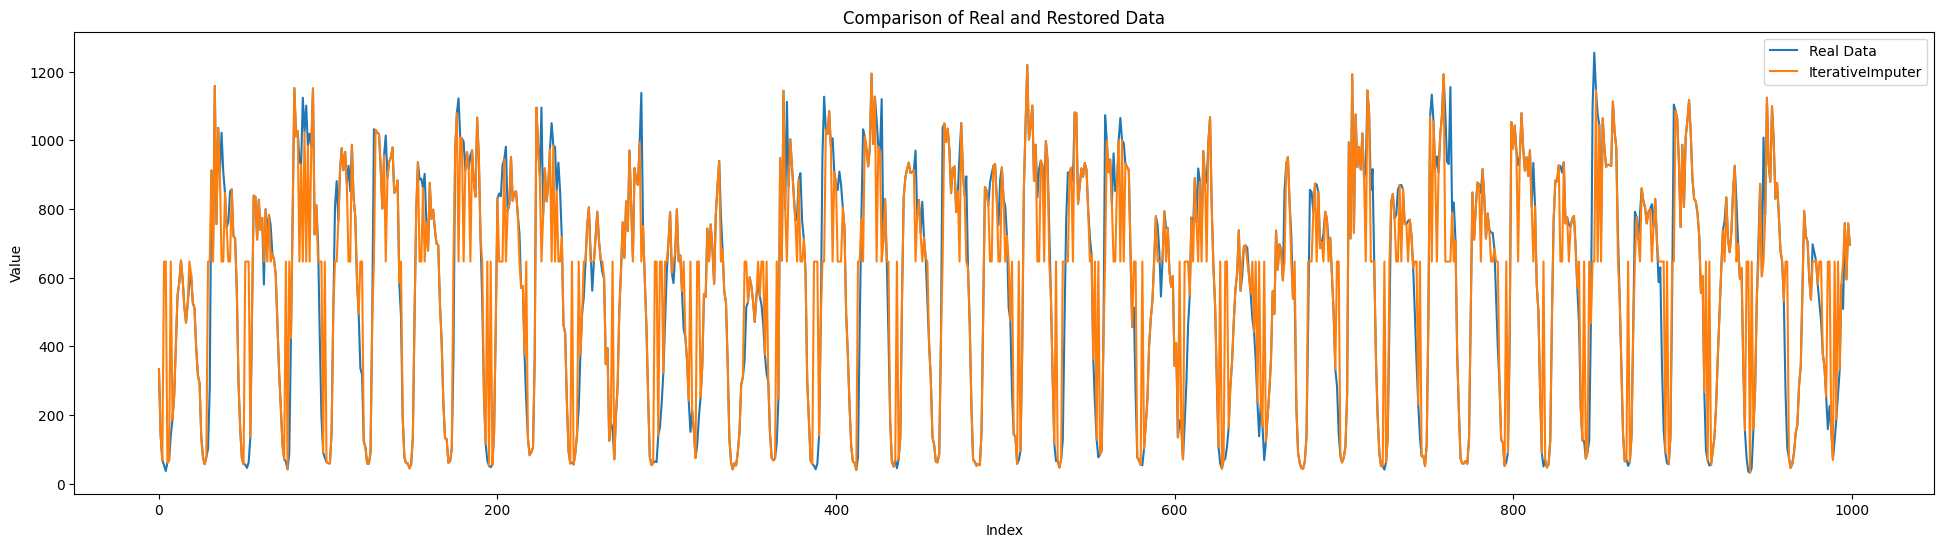

In [24]:
x = np.arange(len(madrid))

plt.figure(figsize=(24, 6))

# Построение графика для исходных данных
plt.plot(x[:1000], madrid[:1000], label='Real Data')

# График для выбранного метода восстановления
plt.plot(x[:1000], madrid_restored_v2[:1000], label='IterativeImputer')

# Настройка графика
plt.title('Comparison of Real and Restored Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

*Вывод*:

knn метод восстановления показывает более низкую среднеквадратичную ошибку

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнении с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановления. Основные блоки обработки данных будут реализованы с использованием Pytorch. Вам не запрещается использовать для реализации Keras.

**табл. 7.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [25]:
recovery_nn = {}

##### 7.2.1 Загрузка и подготовка данных

In [36]:
import copy
import random

In [130]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,:]
print(madrid.shape)

(25000, 10)


In [51]:
def add_nan_2D(x, percent = 0.25):
  x_with_nan = copy.deepcopy(x)
  nan_len = x.shape[0]*x.shape[1]*percent
  nan_counter = 0
  for i in range(x_with_nan.shape[0]):
    for j in range(x_with_nan.shape[1]):
      if nan_counter <= nan_len and random.randint(0,1):
        x_with_nan[i,j]=np.nan
        nan_counter +=1
  return x_with_nan, np.isnan(x_with_nan)

In [60]:
madrid_with_nan, index = add_nan_2D(madrid, 0.25)

In [53]:
madrid_with_nan.shape

(25000, 10)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)
train, test = train_test_split(rolling_madrid,shuffle=False, test_size=0.33)

##### 7.2.2 Базовая модель восстановления данных, построенная на нескольких слоях линейных нейронов.


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

In [31]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [32]:
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int,dim = 1, nums_layers = 3, size_layers = 250):
        super().__init__()

        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers*dim
        self.dim = dim
        self.size_layers = size_layers

        self.start_layers = nn.Sequential(nn.Flatten(),
                                          nn.Linear(size_subsequent*dim, self.size_layers),
                                          nn.LeakyReLU())
        self.model = nn.ModuleList([
                                        (nn.Sequential(
                                                nn.Linear(self.size_layers, self.size_layers), nn.LeakyReLU()
                                            )
                                        )
                                    for x in torch.arange(nums_layers)])
        self.model = nn.Sequential(*self.model)

        self.output = nn.Sequential(nn.Linear(self.size_layers,size_subsequent*dim),nn.Tanh())

    def forward(self, x):
        x = self.start_layers(x)

        x=self.model(x)
        x=self.output(x)
        return x.reshape(x.shape[0],self.size_subsequent,self.dim)

In [55]:
model = LinearModel(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)

print(train.shape,test.shape)
epochs = 20

(16683, 100, 10) (8217, 100, 10)


In [34]:
model

LinearModel(
  (start_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=250, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (model): Sequential(
    (0): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
  )
  (output): Sequential(
    (0): Linear(in_features=250, out_features=1000, bias=True)
    (1): Tanh()
  )
)

In [56]:
import time
times_model = {}

In [69]:
model=model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()

            X, nan = add_nan_2D(X.cpu(),percent)
            ###вставка инициализации нулями nan значений
            X_i = X
            X = torch.from_numpy(np.where(np.isnan(X), 0.0, X))
            #X[torch.isnan(torch.from_numpy(np.array(X)))]=0.0
            recovery = model(X.to(device))
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    print('valid')
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan_2D(X.cpu(),percent)
                #X[torch.isnan(X)]=0.0
                X = torch.from_numpy(np.where(np.isnan(X), 0.0, X))
                recovery = model(X.to(device))
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

<ipython-input-69-ac27f15cd5b8>:23: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


valid


<ipython-input-69-ac27f15cd5b8>:39: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


epoch:1 train:0.010869196651796044, valid:0.01036403013407722
valid
epoch:2 train:0.010215978045373355, valid:0.010158847295498662
valid
epoch:3 train:0.009744237489298957, valid:0.009572415879761527
valid
epoch:4 train:0.009291294951462883, valid:0.008946938483520996
valid
epoch:5 train:0.008851945559026752, valid:0.008807105394874433
valid
epoch:6 train:0.00857543712838685, valid:0.008318361826241016
valid
epoch:7 train:0.00824462448806998, valid:0.007918632733671702
valid
epoch:8 train:0.007846929832322387, valid:0.007557415255424819
valid
epoch:9 train:0.0074580694491693115, valid:0.006958554599925067
valid
epoch:10 train:0.0069893453880373775, valid:0.0066672860709733744
valid
epoch:11 train:0.006579542889391782, valid:0.006337661714863408
valid
epoch:12 train:0.006305311513900528, valid:0.00610308273327212
valid
epoch:13 train:0.006142719654130867, valid:0.005698345796486666
valid
epoch:14 train:0.005930655106002915, valid:0.005619526721623747
valid
epoch:15 train:0.0056690002035

In [70]:
times_model['linear']=end-start

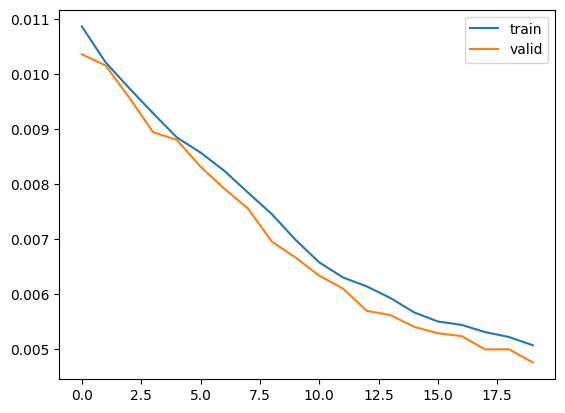

In [71]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [72]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [73]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

In [74]:
recovery_nn['linear'] = test_linear

15346.69221805474


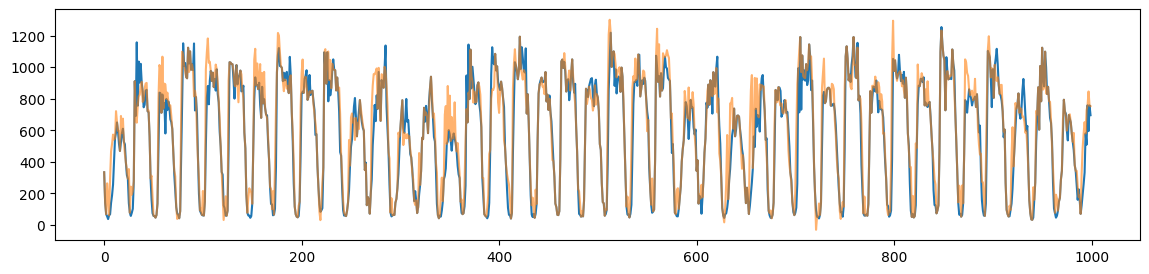

In [75]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_linear[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_linear[index].reshape(1,-1)))

##### 7.2.3 Реккурентная модель востановлениях данных


In [76]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)

        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)


In [77]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()

    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)


In [78]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size)
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size)
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [83]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 10

In [80]:
model

TimeAE(
  (encoder): EncoderGRU(
    (gru): GRU(10, 100)
    (latten): Linear(in_features=10000, out_features=100, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
    (fl): Flatten(start_dim=1, end_dim=-1)
  )
  (decoder): DecoderGRU(
    (gru): GRU(100, 10)
    (latten): Linear(in_features=100, out_features=10000, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
  )
)

In [84]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan_2D(X.cpu(),percent)
            #
            X = torch.from_numpy(np.where(np.isnan(X), 0.0, X))
            recovery = model(X.to(device))
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan_2D(X.cpu(),percent)
                #
                X = torch.from_numpy(np.where(np.isnan(X), 0.0, X))
                recovery = model(X.to(device))
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

<ipython-input-84-2a92d97f0a11>:19: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
<ipython-input-84-2a92d97f0a11>:34: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


epoch:1 train:0.024726635598045884, valid:0.011434819549322128
epoch:2 train:0.010015176575259802, valid:0.00815275252269682
epoch:3 train:0.007744717830970483, valid:0.00641978564202901
epoch:4 train:0.006432103349959257, valid:0.005541547400111607
epoch:5 train:0.005702390406865955, valid:0.005035929085845633
epoch:6 train:0.0051377823333687705, valid:0.004589123532262652
epoch:7 train:0.004797251151082502, valid:0.004406713075618181
epoch:8 train:0.004453477691466495, valid:0.004178394027444166
epoch:9 train:0.004133784643042533, valid:0.0038580284598319567
epoch:10 train:0.003943158254755297, valid:0.0035679710166196723


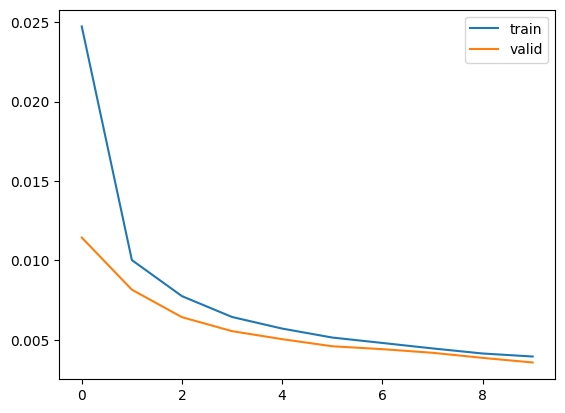

In [85]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [86]:
times_model['ae']=end-start

In [104]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch)
        nan = torch.isnan(batch)
        #
        batch = torch.from_numpy(np.where(np.isnan(batch), 0.0, batch))
        rec = model(batch[None,:].to(device))[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [105]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [106]:
recovery_nn['test_ae'] = test_ae

11100.193533442076


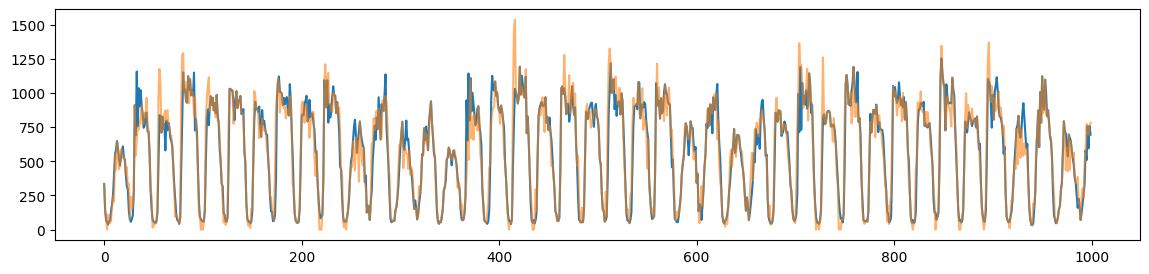

In [107]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))

##### 7.2.4 Сложные модели нейросетевого восстановления данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [108]:
!pip install pypots==0.0.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 kB 2.4 MB/s eta 0:00:00


In [109]:
from pypots.imputation import SAITS


In [112]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=10)

Model initialized successfully. Number of the trainable parameters: 667608


In [116]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

epoch 0: training loss 0.1023, validating loss 0.0366
epoch 1: training loss 0.0651, validating loss 0.0321
epoch 2: training loss 0.0567, validating loss 0.0302
epoch 3: training loss 0.0519, validating loss 0.0297
epoch 4: training loss 0.0477, validating loss 0.0291
epoch 5: training loss 0.0445, validating loss 0.0284
epoch 6: training loss 0.0428, validating loss 0.0266
epoch 7: training loss 0.0416, validating loss 0.0263
epoch 8: training loss 0.0406, validating loss 0.0260
epoch 9: training loss 0.0394, validating loss 0.0267
Finished training.


In [117]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)


In [118]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [119]:
recovery_nn['saits'] = test_saits

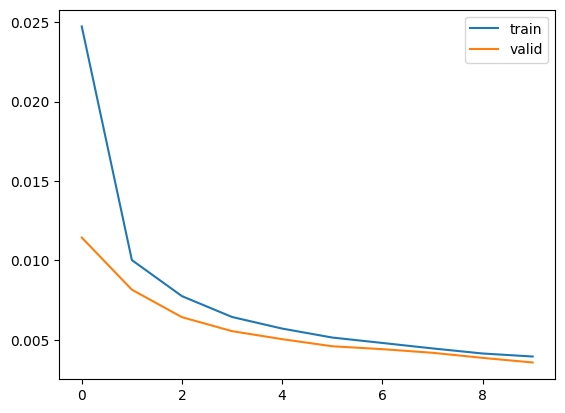

In [125]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

3647.0398664676436


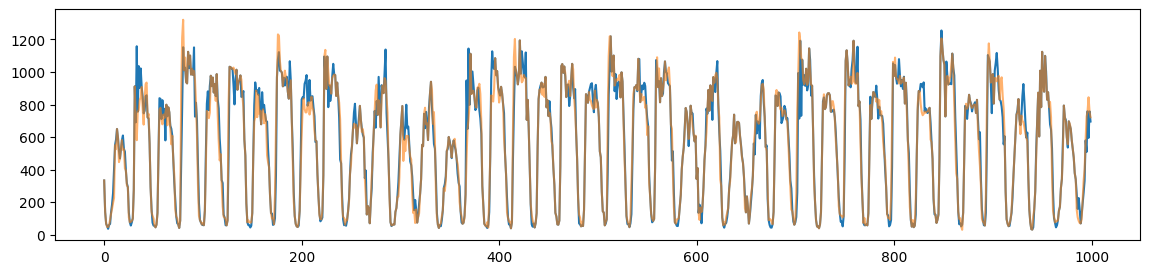

In [120]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

In [121]:
for method in recovery_nn.keys():
  print(method,mean_squared_error(madrid[index].reshape(1,-1),recovery_nn[method][index].reshape(1,-1)),sep='\t')

linear	15346.69221805474
test_ae	11100.193533442076
saits	3647.0398664676436


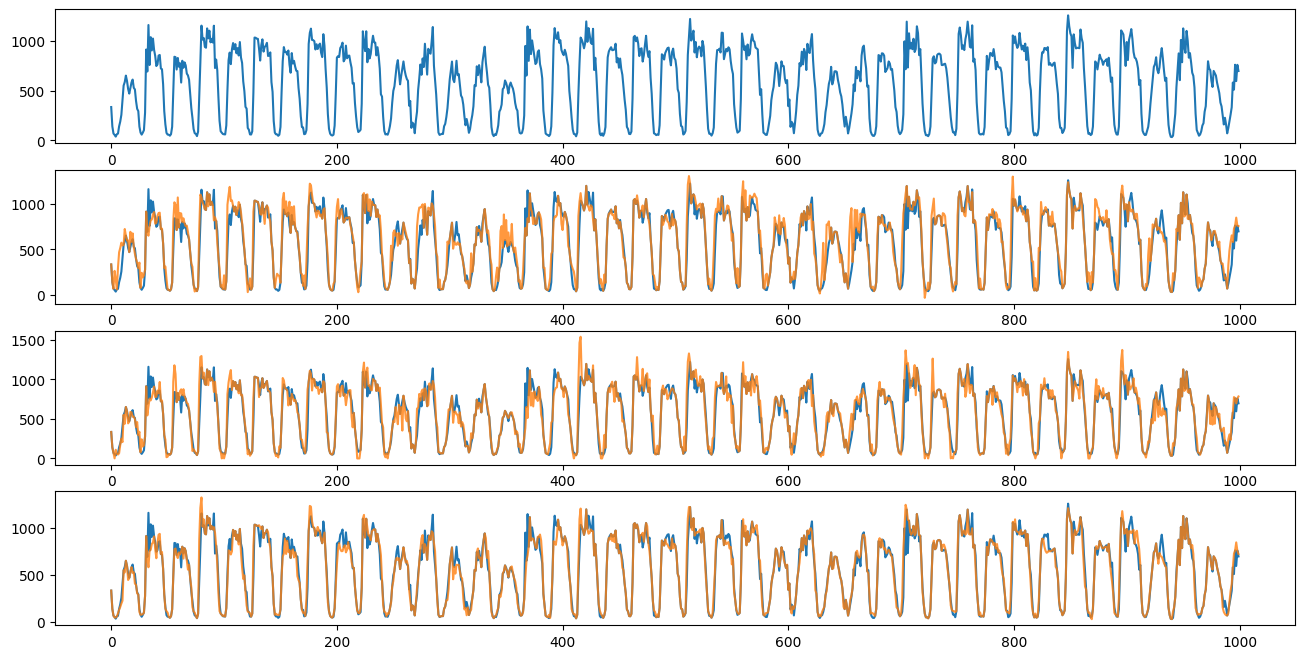

In [132]:
fig, ax =  plt.subplots(figsize=(16,8),ncols=1,nrows=4)
ax[0].plot(madrid[:1000,0])
ax[1].plot(madrid[:1000,0])
ax[2].plot(madrid[:1000,0])
ax[3].plot(madrid[:1000,0])
ax[1].plot(test_linear[:1000,0],alpha=0.8)
ax[2].plot(test_ae[:1000,0],alpha=0.8)
ax[3].plot(test_saits[:1000,0],alpha=0.8)
plt.show()

In [123]:
times_model.values()

dict_values([168.02605772018433, 90.36929559707642, 267.93836283683777])

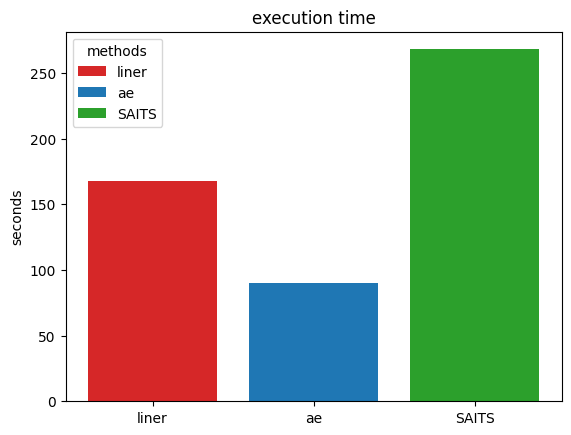

In [124]:
fig, ax = plt.subplots()

labels = ['liner', 'ae', 'SAITS']
counts = times_model.values()
bar_labels = ['liner', 'ae', 'SAITS']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
ax.bar(labels, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('seconds')
ax.set_title('execution time')
ax.legend(title='methods')

plt.show()

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.